In [1]:
# a star

hr={
    'A':10,
    'B':8,
    'C':5,
    'D':7,
    'E':3,
    'F':6,
    'G':5,
    'H':3,
    'I':1,
    'J':0
}
graph_node={
    'A':[('B',6),('F',3)],
    'B':[('C',3),('D',2)],
    'C':[('D',1),('E',5)],
    'D':[('C',1),('E',8)],
    'E':[('J',5),('I',5)],
    'F':[('G',1),('H',7)],
    'G':[('I',3)],
    'H':[('I',2)],
    'I':[('J',3),('E',5)]
}

def astar(start_node,stop_node):
    open_set=set(start_node)
    close_set=set()
    parents={}
    g={}
    parents[start_node]=start_node
    g[start_node]=0
    while len(open_set)>0:
        n=None
        for v in open_set:
            if n==None or hr[v]+g[v]<hr[n]+g[n]:
                n=v
        if n==stop_node or graph_node[n]==None:
            pass
        else:
            for m,weight in graph_node[n]:
                if m not in open_set and m not in close_set:
                    parents[m]=n
                    g[m]=g[n]+weight
                    open_set.add(m)
                else:
                    if g[m]>g[n]+weight:
                        parents[m]=n
                        g[m]=g[n]+weight
                        if m in close_set:
                            close_set.remove(m)
                            open_set.add(m)
        if n==None:
            print("path not found")
            return None
        if n==stop_node:
            path=[]
            while parents[n]!=n:
                path.append(n)
                n=parents[n]
            path.append(start_node)
            path.reverse()
            print("path:- ",path)
            return None
        open_set.remove(n)
        close_set.add(n)
    print("path not found")
    return None

astar('A','J')

path:-  ['A', 'F', 'G', 'I', 'J']


In [2]:
# ao star

h1={
    'A':1,
    'B':6,
    'C':2,
    'D':12,
    'E':2,
    'F':1,
    'G':5,
    'H':7,
    'I':7,
    'J':1
}
graph={
    'A': [[('B',1),('C',1)],[('D',1)]],
    'B': [[('G',1)],[('H',1)]],
    'C': [[('J',1)]],
    'D': [[('E',1),('F',1)]],
    'G': [[('I',1)]]
}

parents={}
solutiongraph={}
status={}

def getheuristic(v):
    return h1.get(v,0)


def setheuristic(v,val):
    h1[v]=val
    
    
def getstatus(v):
    return status.get(v,0)


def setstatus(v,val):
    status[v]=val
    
    
def getneighbour(v):
    return graph.get(v,'')


def mincosttochild(v):
    mincost=0
    childlistdict={}
    childlistdict[mincost]=[]
    flag=True
    for getchildlist in getneighbour(v):
        cost=0
        childlist=[]
        for m,weight in getchildlist:
            cost+=getheuristic(m)+weight
            childlist.append(m)
        if flag==True:
            mincost=cost
            childlistdict[mincost]=childlist
            flag=False
        if flag==False:
            if cost<mincost:
                mincost=cost
                childlistdict[mincost]=childlist
    return mincost,childlistdict[mincost]


def aostar(v,backtracking):
    print("HEURISTIC VALUES------------------------------")
    print(h1)
    print("PROCESSING NODE :",v)
    if getstatus(v)>=0:
        mincost,childlist=mincosttochild(v)
        setheuristic(v,mincost)
        setstatus(v,len(childlist))
        solved=True
        for child in childlist:
            parents[child]=v
            if getstatus(child)!=-1:
                solved=False
        if solved==True:
            setstatus(v,-1)
            solutiongraph[v]=childlist
        if v!=startnode:
            aostar(parents[v],True)
        if backtracking==False:
            for child in childlist:
                setstatus(child,0)
                aostar(child,False)
        
startnode='A'
aostar('A',False)
print("SOLUTION GRAPH-----------------------------")
print(solutiongraph)


HEURISTIC VALUES------------------------------
{'A': 1, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1}
PROCESSING NODE : A
HEURISTIC VALUES------------------------------
{'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1}
PROCESSING NODE : B
HEURISTIC VALUES------------------------------
{'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1}
PROCESSING NODE : A
HEURISTIC VALUES------------------------------
{'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1}
PROCESSING NODE : G
HEURISTIC VALUES------------------------------
{'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 8, 'H': 7, 'I': 7, 'J': 1}
PROCESSING NODE : B
HEURISTIC VALUES------------------------------
{'A': 10, 'B': 8, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 8, 'H': 7, 'I': 7, 'J': 1}
PROCESSING NODE : A
HEURISTIC VALUES------------------------------
{'A': 12, 'B': 8, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G'

In [8]:
# candidate elimination

import pandas as pd
dataset=pd.read_csv("D:/downloads/sample.csv")
x=dataset.iloc[:,0:-1].values
y=dataset.iloc[:,-1].values
s=x[0]
g=[["?" for i in range(len(s))] for i in range(len(s))]
for i,h in enumerate(x):
    if y[i]=='yes':
        for j in range(len(s)):
            if s[j]!=h[j]:
                s[j]="?"
                g[j][j]="?"
    if y[i]=='no':
        for j in range(len(s)):
            if s[j]!=h[j]:
                g[j][j]=s[j]
            else:
                g[j][j]="?"

ind=[i for i,val in enumerate(g) if val==['?','?','?','?','?']]
for i in range(len(ind)):
    g.remove(['?','?','?','?','?'])
    
print("General hypothesis:")
print(g)
print("\nSpecific hypothesis:")
print(s)

General hypothesis:
[['?', 'large', '?', '?', '?'], ['?', '?', '?', '?', 'thick']]

Specific hypothesis:
['?' 'large' 'light' '?' 'thick']


In [16]:
# knn algo

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import datasets

iris=datasets.load_iris()

x_train,x_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.2)
print("datasets loaded")
for i in range(len(iris.target_names)):
    print("label: ",i,"-",iris.target_names[i])
classifier=KNeighborsClassifier(n_neighbors=1)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
for i in range(len(x_test)):
    print("Sample:",x_test[i]," Actual Value:",y_test[i]," Predicted Value:",y_pred[i])
    
print("Classification accuracy:")
print(classifier.score(x_test,y_test))
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))
print("Classification report")
print(classification_report(y_test,y_pred))

datasets loaded
label:  0 - setosa
label:  1 - versicolor
label:  2 - virginica
Sample: [5.2 4.1 1.5 0.1]  Actual Value: 0  Predicted Value: 0
Sample: [4.9 3.  1.4 0.2]  Actual Value: 0  Predicted Value: 0
Sample: [5.  2.  3.5 1. ]  Actual Value: 1  Predicted Value: 1
Sample: [7.  3.2 4.7 1.4]  Actual Value: 1  Predicted Value: 1
Sample: [4.3 3.  1.1 0.1]  Actual Value: 0  Predicted Value: 0
Sample: [7.7 3.  6.1 2.3]  Actual Value: 2  Predicted Value: 2
Sample: [5.7 3.8 1.7 0.3]  Actual Value: 0  Predicted Value: 0
Sample: [5.4 3.  4.5 1.5]  Actual Value: 1  Predicted Value: 1
Sample: [6.2 2.2 4.5 1.5]  Actual Value: 1  Predicted Value: 1
Sample: [4.9 3.6 1.4 0.1]  Actual Value: 0  Predicted Value: 0
Sample: [5.1 3.5 1.4 0.2]  Actual Value: 0  Predicted Value: 0
Sample: [5.6 3.  4.1 1.3]  Actual Value: 1  Predicted Value: 1
Sample: [6.5 2.8 4.6 1.5]  Actual Value: 1  Predicted Value: 1
Sample: [6.9 3.1 5.1 2.3]  Actual Value: 2  Predicted Value: 2
Sample: [5.3 3.7 1.5 0.2]  Actual Valu

In [9]:
# naive bayes classifier

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix

dataset=pd.read_csv("C:/Users/harsh/Downloads/Prog 5-data5 (2).csv")

x=dataset.iloc[:,0:-1].values
y=dataset.iloc[:,-1].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

classifier=GaussianNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

print("Classification accuracy:",accuracy_score(y_test,y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred))

Classification accuracy: 0.7662337662337663
Confusion matrix:
[[84 12]
 [24 34]]


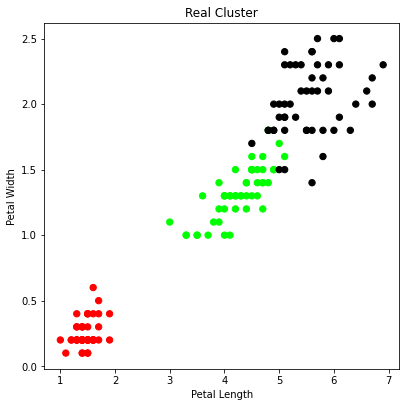

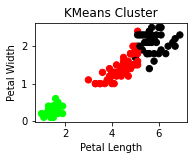

In [12]:
# kmeans

from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris=datasets.load_iris()

x=pd.DataFrame(iris.data)
x.columns=['Sepal_Lenght','Sepal_Widht','Petal_Length','Petal_Width']

y=pd.DataFrame(iris.target)
y.columns=['Target']

model=KMeans(n_clusters=3)
model.fit(x)
kmeans_y=model.predict(x)

plt.figure(figsize=(14,14))
colorSpace=np.array(['red','lime','black'])

plt.subplot(2,2,1)
plt.scatter(x.Petal_Length,x.Petal_Width,c=colorSpace[y.Target],s=40)
plt.title("Real Cluster")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

plt.subplot(2,2,2)
plt.scatter(x.Petal_Length,x.Petal_Width,c=colorSpace[kmeans_y],s=40)
plt.title("KMeans Cluster")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

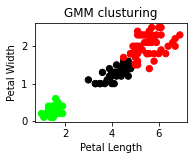

In [13]:
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture

scalar=preprocessing.StandardScaler()
scalar.fit(x)
xsa=scalar.transform(x)
xs=pd.DataFrame(xsa,columns=x.columns)

model_gmm=GaussianMixture(n_components=3)
model_gmm.fit(xs)
gmm_y=model_gmm.predict(xs)

plt.subplot(2,2,3)
plt.scatter(x.Petal_Length,x.Petal_Width,c=colorSpace[gmm_y],s=40)
plt.title("GMM clusturing")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

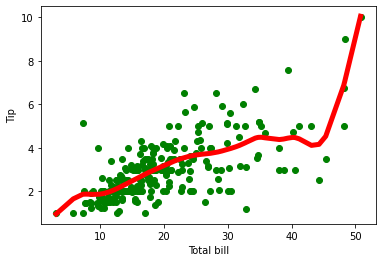

In [23]:
# locally weighted regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def kernel(point,xmat,k):
    m,n=np.shape(xmat)
    weights=np.mat(np.eye(m))
    for i in range(m):
        diff=point-xmat[i]
        weights[i,i]=np.exp(diff*diff.T/(-2*k**2))
    return weights

def localweight(point,xmat,ymat,k):
    wei=kernel(point,xmat,k)
    w=(xmat.T*(wei*xmat)).I*(xmat.T*(wei*ymat.T))
    return w

def localweightregression(xmat,ymat,k):
    m,n=np.shape(xmat)
    ypred=np.zeros(m)
    for i in range(m):
        ypred[i]=xmat[i]*localweight(xmat[i],xmat,ymat,k)
    return ypred

dataset=pd.read_csv("C:/Users/harsh/Downloads/prog10.csv")
# print(dataset)
bill=np.array(dataset.total_bill)
tip=np.array(dataset.tip)

mbill=np.mat(bill)
mtip=np.mat(tip)

m=np.shape(mbill)[1]
ones=np.mat(np.ones(m))

X=np.hstack((ones.T,mbill.T))
ypred=localweightregression(X,mtip,2)

sortIndex=X[:,1].argsort(0)
xsort=X[sortIndex][:,0]

plt.figure()
plt.subplot(1,1,1)
plt.scatter(bill,tip,color="green")
plt.plot(xsort[:,1],ypred[sortIndex],color="red",linewidth=5)
plt.xlabel("Total bill")
plt.ylabel("Tip")
plt.show()

In [9]:
# ann

import numpy as np
X=np.array([[2,8],[3,5],[1,6]],dtype=float)
Y=np.array([[92],[85],[89]],dtype=float)
X=X/np.amax(X,axis=0)
Y=Y/100

def sigmoid(x):
    return 1/(1+np.exp(-x))

def derivative_sigmoid(x):
    return x*(1-x)

epoch=700
lr=0.1

input_neurons=2
hiddenlayer_neurons=3
output_neurons=1

wh=np.random.uniform(size=(input_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))

for i in range(epoch):
    hinp=np.dot(X,wh)+bh
    hiddenlayer_act=sigmoid(hinp)
    outinp=np.dot(hiddenlayer_act,wout)+bout
    output=sigmoid(outinp)
    
    EO=Y-output
    outgrad=derivative_sigmoid(output)
    d_output=EO*outgrad
    
    EH=np.dot(d_output,wout.T)
    hiddengrad=derivative_sigmoid(hiddenlayer_act)
    d_hiddenlayer=EH*hiddengrad
    
    wh+=np.dot(X.T,d_hiddenlayer)*lr
    wout+=np.dot(hiddenlayer_act.T,d_output)*lr
    
print("Input:\n",X)
print("Actual Output:\n",Y)
print("Predicted Output:\n",output)

Input:
 [[0.66666667 1.        ]
 [1.         0.625     ]
 [0.33333333 0.75      ]]
Actual Output:
 [[0.92]
 [0.85]
 [0.89]]
Predicted Output:
 [[0.89177475]
 [0.89241591]
 [0.87426393]]


In [14]:
# decision tree

import pandas as pd
import numpy as np
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from collections import Counter

def entropy(p):
    return sum([-i*math.log(i,2) for i in p])

def entropy_of_list(a_list):
    cnt=Counter(a_list)
    n=len(a_list)*1.0
    p=[v/n for v in cnt.values()]
    return entropy(p)

def information_gain(df,independent,dependent):
    print("information gain for ",independent)
    df_split=df.groupby(independent)
    nobs=len(df.index)*1.0
    for name,group in df_split:
        print(name)
        print(group)
    df_agg=df_split.agg({dependent:[entropy_of_list,lambda x:len(x)/nobs]})[dependent]
    df_agg.columns=['entropy','propobservation']
    new_entropy=sum(df_agg['entropy']*df_agg['propobservation'])
    old_entropy=entropy_of_list(df[dependent])
    return old_entropy-new_entropy

dataset=pd.read_csv("C:/Users/harsh/Downloads/prgm4.csv")

print("Total entropy gain: ",entropy_of_list(dataset['answer']))
print("Information gain taking outlook ",information_gain(dataset,'outlook','answer'))
print("Information gain taking temperature ",information_gain(dataset,'temperature','answer'))
print("Information gain taking humidity ",information_gain(dataset,'humidity','answer'))
print("Information gain taking wind ",information_gain(dataset,'wind','answer'))

x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

check={
    'outlook':'Overcast',
    'temperature':'Cool',
    'humidity':'High',
    'wind':'Strong'
}

x=x.append(check,ignore_index=True)

x=x.apply(LabelEncoder().fit_transform)

x_in=x.iloc[-1,:]
x=x.iloc[:-1,:]

classifier=DecisionTreeClassifier()
classifier.fit(x,y)

y_pred=classifier.predict([x_in])
print(y_pred)

Total entropy gain:  0.9402859586706309
information gain for  outlook
Overcast
     outlook temperature humidity    wind answer
2   Overcast         Hot     High    Weak    Yes
6   Overcast        Cool   Normal  Strong    Yes
11  Overcast        Mild     High  Strong    Yes
12  Overcast         Hot   Normal    Weak    Yes
Rain
   outlook temperature humidity    wind answer
3     Rain        Mild     High    Weak    Yes
4     Rain        Cool   Normal    Weak    Yes
5     Rain        Cool   Normal  Strong     No
9     Rain        Mild   Normal    Weak    Yes
13    Rain        Mild     High  Strong     No
Sunny
   outlook temperature humidity    wind answer
0    Sunny         Hot     High    Weak     No
1    Sunny         Hot     High  Strong     No
7    Sunny        Mild     High    Weak     No
8    Sunny        Cool   Normal    Weak    Yes
10   Sunny        Mild   Normal  Strong    Yes
Information gain taking outlook  0.2467498197744391
information gain for  temperature
Cool
    outloo